In [1]:
import os
os.chdir('../..')

In [2]:
import convokit
import pickle
import json

In [3]:
DATA_DIR = "data_fixed"

In [4]:
os.chdir('convokit/tensors')

In [5]:
with open(os.path.join(DATA_DIR, 'rank_to_factors.p'), 'rb') as f:
    rank_to_factors = pickle.load(f)

In [6]:
with open(os.path.join(DATA_DIR, 'hg_features.p'), 'rb') as f:
    hg_features = pickle.load(f)

with open(os.path.join(DATA_DIR, 'subreddits.p'), 'rb') as f:
    subreddits = pickle.load(f)

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

In [8]:
def get_anomalous_points(factor_full, idx):
    factor = factor_full[:, idx]
    reshaped = factor.reshape((factor.shape[0], 1))
    scaled = scaler.fit_transform(reshaped)
    pos_pts = np.argwhere(scaled.reshape(factor.shape[0]) > 1.5).flatten()
    neg_pts = np.argwhere(scaled.reshape(factor.shape[0]) < -1.5).flatten()
    return pos_pts, neg_pts

In [9]:
time_factor = rank_to_factors[9][0] # (9, 9)
thread_factor = rank_to_factors[9][1] # (10000, 9)
feature_factor = rank_to_factors[9][2] # (140, 9)

In [10]:
with open(os.path.join(DATA_DIR, 'convo_ids.p'), 'rb') as f:
    thread_ids = pickle.load(f)

In [11]:
from convokit import Corpus, download
corpus = Corpus(filename="longreddit_construction/long-reddit-corpus")

In [12]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        utt.meta['order'] = idx

In [17]:
def get_convo_details(convo):
    print(convo.id)
    print("Subreddit: {}".format(convo.get_utterance(convo.id).meta['subreddit']))
    convo.print_conversation_structure(lambda utt: str(utt.meta['order']) + ". " + utt.user.id, limit=20)

In [18]:
convos = list(corpus.iter_conversations())

In [19]:
from convokit import HyperConvo

In [20]:
import random

## Inspecting threads from Factor 1

In [21]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [22]:
rank = time_factor.shape[1]
num_examples = 3

In [31]:
corpus.get_conversation('dztnr7g').print_conversation_structure()

HabloEspwnol
    CaptainInertia
    Jaynautic
        _Serene_
        mattwithoutyou
            averyzisme
    Lefka356
        SmellsonCam
            Gettingbetter
        Calgary_PI
    lawniedangle
    realjoeydood
    mew0
        AreYaEatinThough
            HabloEspwnol
            ElVille55
        ChatteChienne
            Jordan311R
    Corybantic126
    stoneystone007
    Helenius


In [28]:
corpus.get_conversation('dztnr7g').print_conversation_structure(lambda utt: utt.text)

[Goddamn it](https://i.imgur.com/xgKOQNh.png)
    Yeah I'm not worried! 
    The one ring to rule them all.
        [👌](https://i.imgur.com/DKnQ1yZ.jpg)
        "I was there that day Aragorn! I was there the day Isildur lost the game!" 
            FUCK WHY DO YOU PEOPLE DO THIS TO ME ALL THE TIME FUCK
    Honestly, I thought he was playing the air guitar.
        ‘Sauron’, a Saxon cover band 
            A SAXON COVER BAND ON AN OPEN FIELD
        Lord of the Strings
    Same here.  He even has the fist rdy to punch me....
    Mother effer. I almost upvoted this. Whew.
    I thought the rule was it can't be below the waist
        At my school the rule was it was only valid if below the waist. 

            Truth.
            Same
        No. It has to be below the waist. Otherwise its too easy. You can just do it right where they are looking. The challenge is in making them look down. 
            guys, i just lost the game
    Got em
    Legit saw that before anything else... Shit. 

In [32]:
from convokit.tensors.tensor_pipeline import get_convo_tensor

In [39]:
feats = [hg_features[i] for i in [63, 70, 83, 107, 137]]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count[external reciprocity motif],0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,6.0
max[indegree over c->c mid-thread responses],0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
max[indegree over C->c mid-thread responses],0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
max[indegree over C->C mid-thread responses],0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
count[incoming triads over mid-thread],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,6.0,6.0,6.0


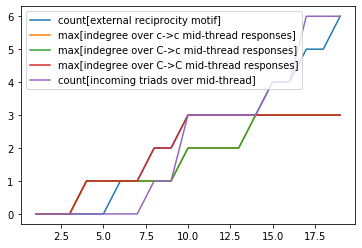

In [44]:
get_convo_tensor('dpfdtq8', feats) #e69alls

In [49]:
# neg_feats = [hg_features[i] for i in [61, 131]]
pos_feats = [hg_features[i] for i in [4, 21, 67, 71, 85, 137]]
neg_feats = [hg_features[i] for i in [20, 44, 61, 69, 131, 139]]
#  20  44  61  69 131 139

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2nd-argmax[indegree over c->c responses],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2nd-argmax[indegree over C->c responses],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
count[incoming triads],0.0,1.0,1.0,3.0,6.0,10.0,10.0,15.0,21.0,22.0,29.0,29.0,31.0,34.0,35.0,43.0,52.0,54.0,54.0
argmax[indegree over c->c mid-thread responses],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
argmax[indegree over C->c mid-thread responses],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
count[incoming triads over mid-thread],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,6.0,7.0,7.0,7.0,9.0,9.0


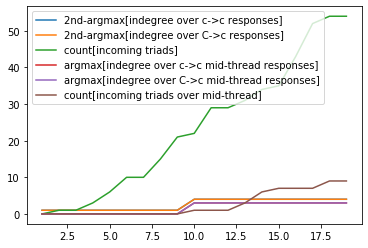

In [50]:
get_convo_tensor('doenlty', pos_feats) #dox97s6

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2nd-argmax[indegree over c->c responses],1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2nd-argmax[indegree over C->c responses],1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
count[incoming triads],0.0,0.0,1.0,3.0,3.0,3.0,4.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,10.0,12.0
argmax[indegree over c->c mid-thread responses],0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
argmax[indegree over C->c mid-thread responses],0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
count[incoming triads over mid-thread],0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,6.0


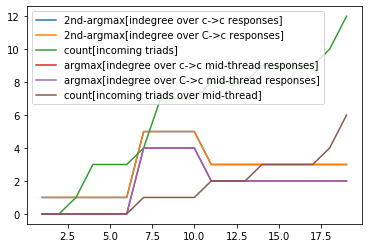

In [51]:
get_convo_tensor('dox97s6', pos_feats) #dox97s6

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2nd-argmax[outdegree over C->c responses],0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,14.0,15.0,15.0,9.0
2nd-argmax[outdegree over C->C responses],0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,14.0,15.0,15.0,9.0
count[reciprocity motif],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count[outgoing triads],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
count[reciprocity motif over mid-thread],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count[outgoing triads over mid-thread],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


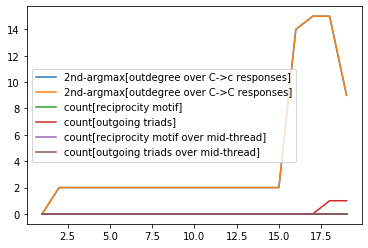

In [48]:
get_convo_tensor('doenlty', neg_feats) #dox97s6

In [38]:
for idx in range(rank):
    print("#########################################################")
    print(color.BOLD + "Inspecting threads from factor {}".format(idx+1) + color.END)
    print()
    pos_threads, neg_threads = get_anomalous_points(thread_factor, idx)
    pos_features, neg_features = get_anomalous_points(feature_factor, idx)
    print("Positive features", pos_features)
    print("Negative features", neg_features)
    print(color.BOLD + color.GREEN + "Positive examples" + color.END)
    print()
    try:
        for thread_idx in random.sample(list(pos_threads), num_examples):
            get_convo_details(convos[thread_idx])
            print()
    except ValueError:
        pass
    print()
    print(color.BOLD + color.RED + "Negative examples" + color.END)
    
    try:
        for thread_idx in random.sample(list(neg_threads), num_examples):
            get_convo_details(convos[thread_idx])
            print()
    except ValueError:
        pass
    print("#########################################################")
    print()

#########################################################
Inspecting threads from factor 1

Positive features []
Negative features [  0  13  37  63  67 137]
Positive examples

dtyck7z
Subreddit: SquaredCircle
1. BROKENSavageOmega
    2. nine25
        3. BROKENSavageOmega
            4. Butmac
                6. Stamps_dot_com
                    7. CliffeyWanKenobi
                        9. zilltheinfestor
                            10. Butmac
                                13. Bail__
                                    14. wmcguire18
                                        15. Stamps_dot_com
                                            17. wmcguire18
                        19. Drama79
            16. cooljammer00
            18. x131e
        5. Carblarble
    8. Doctor_Cowboy
        20. slicknick3822
    11. StonewallJackoff
    12. lolothejetplane

dqlviyw
Subreddit: IAmA
1. M-Qada
    2. JudgementalPrick
        3. qualityshitpostidiot
            4. AMBsFather
               

    7. Niptacular_Nips
    8. CephiDelco
    9. BellacosePlayer
        12. MightyMinnesota
        13. jklingftm
    10. dbcanuck
    19. weeglos

#########################################################

#########################################################
Inspecting threads from factor 4

Positive features [ 61  67  69 139]
Negative features [  4  14  21  38  45  63  71  84  85 108 109 133]
Positive examples

dzvlrpy
Subreddit: funny
1. Jimmy_October
    2. xSHITx
        3. Lightweaver777
        7. Robotman1974
            12. Vangogh_flamingo
                15. OnyxFoxtrot
                    18. Vangogh_flamingo
                16. MyPeeSacIsFull
                    17. Vangogh_flamingo
        9. jotun86
    4. Degenatron
    5. RedAero
        8. SomeoneTookUserName2
            10. el-toro-loco
                11. el-toro-loco
        19. 1911isokiguess
    6. cattaclysmic
    13. shortndumbmanchild
        14. Jimmy_October
    20. imcompetent

dqo7lbw
Subreddit: worl

                10. Ignismare
                    11. Casiell89
                        12. Ignismare
                            13. LuitenantDan
                                14. Ignismare
                18. Ellthan
            9. Iwannabefabulous
        17. Bloopaholic
    4. RhenCarbine
    6. Fireaddicted
        16. Rayquaza2233
    19. Kolz


Negative examples
e2ttouj
Subreddit: The_Donald
1. TFittonJW
    2. SuperMarioKartWinner
        11. mmmhthatguy
        20. IHeartMyDoggy
    3. MAJORAPPLEHEAD
        4. TFittonJW
            5. MAJORAPPLEHEAD
                6. comic630
                    19. DystopianDoubleThink
    7. Spaceforcejuan
    8. FreeBased1
    9. POTUSTrump4USA
    10. redditor8852
        12. 1st_Covfefe
    13. LONGLIVEDONALDTRUMP
    14. DemocritusThrace
    15. Stupendous_Intellect
    16. bsbbtnh
    17. ScolopendrineMesser
    18. 14metstom

dvuox4j
Subreddit: movies
1. [deleted]
    2. ConceptualTrap
        3. [deleted]
            4. Critcho
  